In [1]:
%load_ext autoreload

In [2]:
%autoreload

import sys
sys.path.append("../..")

import numpy as np
import darkhistory.physics as phys

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

from plot_params import params
pylab.rcParams.update(params)
cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']


import darkhistory.low_energy.bound_free as bf

In /Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
/Users/hongwan/anaconda/envs/python3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/hongwan/anaconda/envs/python3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in

Check the value of $\Theta$, and compare with Burgess MNRAS 69, 1 (1965) Table 1. 

In [3]:
n = 3

x_ary = np.array([
    0., 0.005, 0.010, 0.020, 0.040, 0.080, 0.160, 0.320, 0.640, 
    1.280, 2.560, 5.120, 10.240, 20.480, 40.960
])

bf.Theta(0, 1, n, np.array([np.sqrt(x)/n for x in x_ary]))

# for n = 3, l = 0 and lp = 1, the result should be 
# array([3.26878159e+00, 3.23581642e+00, 3.20332812e+00, 3.13974626e+00,
    #    3.01792190e+00, 2.79387132e+00, 2.41223295e+00, 1.84464612e+00,
    #    1.16637146e+00, 5.70920280e-01, 2.09318471e-01, 5.80348687e-02,
    #    1.25817791e-02, 2.21669018e-03, 3.29543524e-04])

array([3.26878159e+00, 3.23581642e+00, 3.20332812e+00, 3.13974626e+00,
       3.01792190e+00, 2.79387132e+00, 2.41223295e+00, 1.84464612e+00,
       1.16637146e+00, 5.70920280e-01, 2.09318471e-01, 5.80348687e-02,
       1.25817791e-02, 2.21669018e-03, 3.29543524e-04])

Check the value of $I$, and compare with Burgess MNRAS 69, 1 (1965) Table 2. 

In [4]:
T_ary_large = np.array([64, 32, 16, 8, 4, 2, 1.]) * 1e4 * phys.kB
T_ary_small = np.array([1./2., 1./4., 1./8., 1./16., 1./32., 1./64.]) * 1e4 * phys.kB

n = 5
l = 0
lp = 1

# For comparison with Burgess 1965, use rydberg = alpha^2 me / 2, which is not quite right. 


print(np.concatenate(
    ([(T / phys.kB / 1e4) * bf.I_Burgess(n, l, lp, T, T_r=T, stimulated_emission=False, old_rydberg=True) for T in T_ary_large],
     [bf.I_Burgess(n, l, lp, T, T_r=T, stimulated_emission=False) for T in T_ary_small])
))
n = 5
l = 2
lp = 1

print(np.concatenate(
    ([(T / phys.kB / 1e4) * bf.I_Burgess(n, l, lp, T, T_r=T, stimulated_emission=False, old_rydberg=True) for T in T_ary_large],
     [bf.I_Burgess(n, l, lp, T, T_r=T, stimulated_emission=False) for T in T_ary_small])
))

# for n = 5, l = 0, lp = 1
# array([44.22113959, 31.09493455, 20.4744184 , 12.63891471,  7.35965593,
        # 4.08304031,  2.18285182,  2.27335983,  2.32622893,  2.35483288,
        # 2.36929248,  2.37640332,  2.37989976])
# for n = 5, l = 2, lp = 1
# array([0.94498479, 0.89815897, 0.82453737, 0.71969013, 0.58731432,
    #    0.44177563, 0.3039484 , 0.38316254, 0.4473834 , 0.49230609,
    #    0.52010985, 0.53588686, 0.54434773])

[44.22113805 31.09493365 20.47441794 12.6389145   7.35965585  4.08304028
  2.18285181  2.27330529  2.32619853  2.354817    2.36928473  2.37639943
  2.37989799]
[0.94498473 0.89815892 0.82453732 0.71969009 0.5873143  0.44177562
 0.30394839 0.38310512 0.44734047 0.49227809 0.52009344 0.53587785
 0.54434303]


Generate the table of values of $g$. 

In [5]:
# %autoreload 2

# test = bf.generate_g_table_dict()

# import pickle

# pickle.dump(test, open('./g_table_dict_100.p', 'wb'))

Checks for $\alpha_{nl}$, calculation of $\beta_{nl}$ in comparison with the expectation from detailed balance applied to $\alpha_{nl}$, and the same for $\beta_B$. 

In [6]:
%autoreload

# Checks with Yacine's Effective Rates code.

n = 28
l = 2
T_r = 1.86e-2
T_m = 7.43e-3
print(bf.alpha_nl(n, l, T_m, T_r=T_r, stimulated_emission=True))
print(bf.alpha_nl(n, l, T_m, T_r=T_r, stimulated_emission=False))

T_r = 2.80721620e-03 * phys.rydberg

beta_B_calc = 0. 
beta_B_det_bal_calc = 0. 

for n in 2+np.arange(150-1):

    for l in np.arange(n):

        expected_beta_nl = (2*np.pi*phys.mu_ep*T_r)**(3/2) / (2*l + 1) / (2*np.pi*phys.hbar)**3 / phys.c**3 * (
            np.exp(-phys.rydberg / n**2 / T_r) * bf.alpha_nl(n, l, T_r, T_r=T_r, stimulated_emission=True)
        )
        calc_beta_nl = bf.beta_nl(n, l, T_r)

        beta_B_det_bal_calc += (2*l + 1) * expected_beta_nl * np.exp(-(1./4 - 1./n**2)*phys.rydberg/T_r)
        beta_B_calc += (2*l + 1) * calc_beta_nl * np.exp(-(1./4 - 1./n**2)*phys.rydberg/T_r)

        ratio = calc_beta_nl/expected_beta_nl

        if ratio < 0.9999: 

            print('n: ', n, ' l: ', l, ' ratio: ', ratio)

print(beta_B_det_bal_calc)
print(beta_B_calc)

computed_alpha_B = bf.alpha_B(T_r, T_r=T_r, n=150) 
beta_B_full_det_bal = computed_alpha_B * np.exp(-phys.rydberg/4./T_r) * (2*np.pi*phys.mu_ep*T_r)**(3/2) / (2*np.pi*phys.hbar)**3 / phys.c**3

print(beta_B_full_det_bal)





2.152428278949725e-15
1.5186319955279132e-15
1.8421900841856539e-31
1.8421900841856563e-31
1.8421900841856539e-31


# Comparison with Kotelnikov and Milstein arXiv:1810.08071

In [7]:
# Equation 37
def alpha_recomb_full_Kot(T_over_rydberg):

    return (
        8.414*(np.log(1 + 1./T_over_rydberg) + 3.499) * (phys.alpha**4 * phys.c * phys.bohr_rad**2) 
        / (T_over_rydberg**0.5 + 0.6517*T_over_rydberg +   0.2138*T_over_rydberg**(3/2))
    )

# Equation 38
def alpha_recomb_1_Kot(T_over_rydberg):

    return (
        17.41 * (phys.alpha**4 * phys.c * phys.bohr_rad**2) 
        / (T_over_rydberg**0.5 + 0.3593*T_over_rydberg**(7/6) + 0.1471*T_over_rydberg**(3/2))
    )

In [8]:
# Compute a table of alpha_B with stimulated emission, alpha_B without stimulated emission, 
# and beta_B. 

T_over_ryd_compute_ary = np.logspace(-5, 2, num=30)

n = 150

alpha_B_computed_with_stim = np.array([bf.alpha_B(T * phys.rydberg, T_r=T * phys.rydberg, stimulated_emission=True, n=n) for T in T_over_ryd_compute_ary])

alpha_B_computed_no_stim = np.array([bf.alpha_B(T * phys.rydberg, T_r=T * phys.rydberg, stimulated_emission=False, n=n) for T in T_over_ryd_compute_ary])

beta_B_computed = np.array([bf.beta_B(T * phys.rydberg, n=n) for T in T_over_ryd_compute_ary])

(10.0, 3000.0, 1e-14, 2e-10)

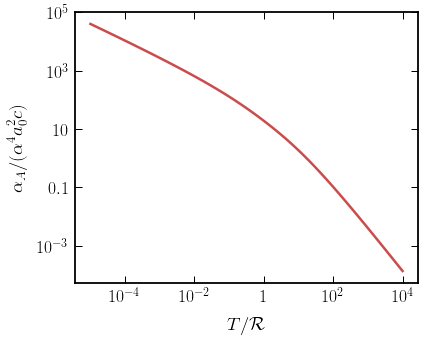

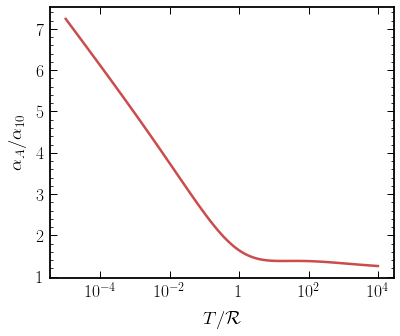

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


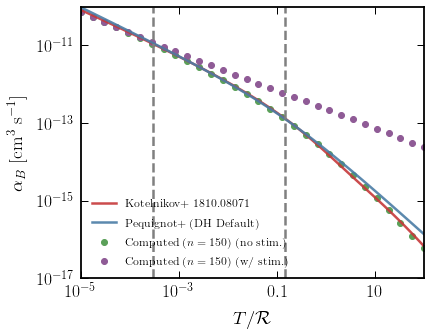

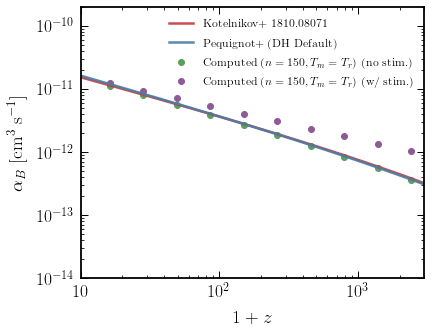

In [9]:
plt.figure()

T_over_ryd_ary = np.logspace(-5, 4, num=100)

plt.xscale('log')
plt.yscale('log')

plt.plot(T_over_ryd_ary, alpha_recomb_full_Kot(T_over_ryd_ary) / (phys.alpha**4 * phys.c * phys.bohr_rad**2))

plt.xlabel(r'$T/\mathcal{R}$')
plt.ylabel(r'$\alpha_A / (\alpha^4 a_0^2 c)$')

plt.figure()

plt.xscale('log')

plt.plot(T_over_ryd_ary, alpha_recomb_full_Kot(T_over_ryd_ary) / alpha_recomb_1_Kot(T_over_ryd_ary))

plt.xlabel(r'$T/\mathcal{R}$')
plt.ylabel(r'$\alpha_A / \alpha_{10}$')

plt.figure()

plt.xscale('log')
plt.yscale('log')

Kot_plot, = plt.plot(T_over_ryd_ary, alpha_recomb_full_Kot(T_over_ryd_ary) - alpha_recomb_1_Kot(T_over_ryd_ary), label ='Kotelnikov+ 1810.08071' )
Pequignot_plot, = plt.plot(T_over_ryd_ary, phys.alpha_recomb(T_over_ryd_ary * phys.rydberg, 'HI') / 1.125, label='Pequignot+ (DH Default)')
computed_no_stim_plot = plt.scatter(T_over_ryd_compute_ary, alpha_B_computed_no_stim, color=cols_default[2], label=r'Computed $(n = 150)$ (no stim.)')
computed_with_stim_plot = plt.scatter(T_over_ryd_compute_ary, alpha_B_computed_with_stim, color=cols_default[3], label=r'Computed $(n = 150)$ (w/ stim.)')
plt.legend(handles=[Kot_plot, Pequignot_plot, computed_no_stim_plot, computed_with_stim_plot], fontsize=12)

plt.xlabel(r'$T / \mathcal{R}$')
plt.ylabel(r'$\alpha_B$ [cm$^3$ s$^{-1}$]')

plt.axvline(0.004 / phys.rydberg, color='gray', ls='--')
plt.axvline(2 / phys.rydberg, color='gray', ls='--')

plt.axis([1e-5, 100, 1e-17, 1e-10])

plt.figure()

plt.xscale('log')
plt.yscale('log')

rs_ary = T_over_ryd_ary * phys.rydberg / phys.TCMB(1)
rs_compute_ary = T_over_ryd_compute_ary * phys.rydberg / phys.TCMB(1) 

Kot_plot, = plt.plot(rs_ary, alpha_recomb_full_Kot(T_over_ryd_ary) - alpha_recomb_1_Kot(T_over_ryd_ary), label ='Kotelnikov+ 1810.08071' )
Pequignot_plot, = plt.plot(rs_ary, phys.alpha_recomb(T_over_ryd_ary * phys.rydberg, 'HI') / 1.125, label='Pequignot+ (DH Default)')
computed_no_stim_plot = plt.scatter(rs_compute_ary, alpha_B_computed_no_stim, color=cols_default[2], label=r'Computed $(n = 150, T_m = T_r)$ (no stim.)')
computed_with_stim_plot = plt.scatter(rs_compute_ary, alpha_B_computed_with_stim, color=cols_default[3], label=r'Computed $(n = 150, T_m = T_r)$ (w/ stim.)')

plt.legend(handles=[Kot_plot, Pequignot_plot, computed_no_stim_plot, computed_with_stim_plot], fontsize=12)

plt.xlabel(r'$1+z$')
plt.ylabel(r'$\alpha_B$ [cm$^3$ s$^{-1}$]')

plt.axvline(0.004 / phys.rydberg, color='gray', ls='--')
plt.axvline(2 / phys.rydberg, color='gray', ls='--')

plt.axis([10, 3000, 1e-14, 2e-10])

(1e-05, 100.0, 0.5, 1.5)

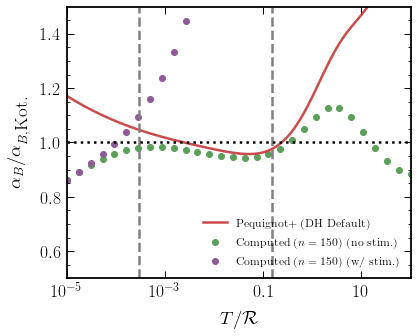

In [10]:
plt.figure()
plt.xscale('log')

Kot_compare_Pequignot = alpha_recomb_full_Kot(T_over_ryd_ary) - alpha_recomb_1_Kot(T_over_ryd_ary)
Kot_compare_computed  = alpha_recomb_full_Kot(T_over_ryd_compute_ary) - alpha_recomb_1_Kot(T_over_ryd_compute_ary)

Pequignot_plot, = plt.plot(T_over_ryd_ary, phys.alpha_recomb(T_over_ryd_ary * phys.rydberg, 'HI') / 1.125 / Kot_compare_Pequignot, label='Pequignot+ (DH Default)')
computed_no_stim_plot = plt.scatter(T_over_ryd_compute_ary, alpha_B_computed_no_stim / Kot_compare_computed, color=cols_default[2], label=r'Computed $(n = 150)$ (no stim.)')
computed_with_stim_plot = plt.scatter(T_over_ryd_compute_ary, alpha_B_computed_with_stim / Kot_compare_computed, color=cols_default[3], label=r'Computed $(n = 150)$ (w/ stim.)')

plt.legend(handles=[Pequignot_plot, computed_no_stim_plot, computed_with_stim_plot], fontsize=12)

plt.xlabel(r'$T / \mathcal{R}$')
plt.ylabel(r'$\alpha_B / \alpha_{B,\textrm{Kot.}}$')

plt.axvline(0.004 / phys.rydberg, color='gray', ls='--')
plt.axvline(2 / phys.rydberg, color='gray', ls='--')
plt.axhline(1, color='k', ls=':' )

plt.axis([1e-5, 100, 0.5, 1.5])

(1e-05, 100.0, 0.5, 1.5)

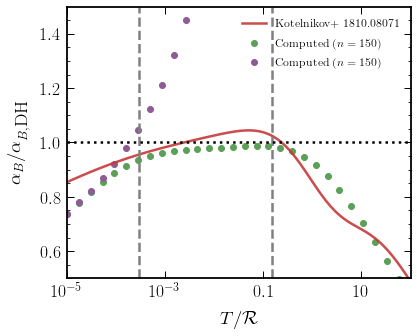

In [11]:
plt.figure()
plt.xscale('log')

DH_compare_Kot = phys.alpha_recomb(T_over_ryd_ary * phys.rydberg, 'HI') / 1.125
DH_compare_computed  = phys.alpha_recomb(T_over_ryd_compute_ary * phys.rydberg, 'HI') / 1.125

Kot_plot, = plt.plot(T_over_ryd_ary, (alpha_recomb_full_Kot(T_over_ryd_ary) - alpha_recomb_1_Kot(T_over_ryd_ary)) / DH_compare_Kot, label='Kotelnikov+ 1810.08071')
computed_no_stim_plot = plt.scatter(T_over_ryd_compute_ary, alpha_B_computed_no_stim / DH_compare_computed, color=cols_default[2], label=r'Computed $(n = 150)$')
computed_with_stim_plot = plt.scatter(T_over_ryd_compute_ary, alpha_B_computed_with_stim / DH_compare_computed, color=cols_default[3], label=r'Computed $(n = 150)$')

plt.legend(handles=[Kot_plot, computed_no_stim_plot, computed_with_stim_plot], fontsize=12)

plt.xlabel(r'$T / \mathcal{R}$')
plt.ylabel(r'$\alpha_B / \alpha_{B,\textrm{DH}}$')

plt.axvline(0.004 / phys.rydberg, color='gray', ls='--')
plt.axvline(2 / phys.rydberg, color='gray', ls='--')
plt.axhline(1, color='k', ls=':' )

plt.axis([1e-5, 100, 0.5, 1.5])

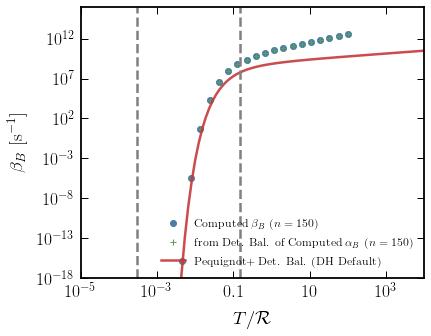

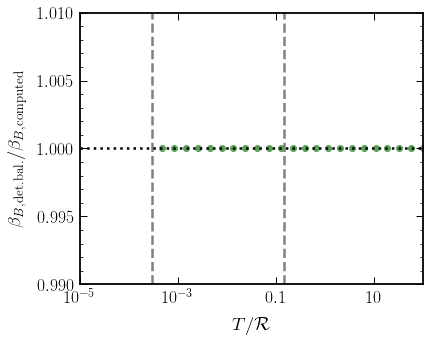

In [12]:
plt.figure() 
plt.xscale('log')
plt.yscale('log')

DH_beta = phys.beta_ion(T_over_ryd_ary * phys.rydberg, 'HI')

beta_B_computed_det_bal = (
    (2 * np.pi * phys.mu_ep * T_over_ryd_compute_ary * phys.rydberg)**(3/2) 
    / (2*np.pi*phys.hbar*phys.c)**3 * alpha_B_computed_with_stim 
    * np.exp(-1./4./T_over_ryd_compute_ary)
) 

DH_beta_plot, = plt.plot(T_over_ryd_ary, DH_beta, label='Pequignot+ Det. Bal. (DH Default)')
computed_plot = plt.scatter(T_over_ryd_compute_ary, beta_B_computed, label=r'Computed $\beta_B$ $(n = 150)$', color=cols_default[1])
det_bal_plot  = plt.scatter(T_over_ryd_compute_ary, beta_B_computed_det_bal, label=r'from Det. Bal. of Computed $\alpha_B$ $(n = 150)$', marker='+', color=cols_default[2], linewidth=1)

plt.legend(handles=[computed_plot, det_bal_plot, DH_beta_plot], fontsize=12)

plt.axis([1e-5, 1e4, 1e-18, 1e16])

plt.xlabel(r'$T / \mathcal{R}$')
plt.ylabel(r'$\beta_B$ [s$^{-1}$]')
plt.axvline(0.004 / phys.rydberg, color='gray', ls='--')
plt.axvline(2 / phys.rydberg, color='gray', ls='--')


plt.figure() 
plt.xscale('log')

det_bal_plot  = plt.scatter(T_over_ryd_compute_ary[7:], beta_B_computed_det_bal[7:]/beta_B_computed[7:], label=r'from Det. Bal. of Computed $\alpha_B$', color=cols_default[2])


plt.axis([1e-5, 1e2, .99, 1.01])

plt.xlabel(r'$T / \mathcal{R}$')
plt.ylabel(r'$\beta_{B,\mathrm{det. bal.}}/\beta_{B,\mathrm{computed}}$')

plt.axvline(0.004 / phys.rydberg, color='gray', ls='--')
plt.axvline(2 / phys.rydberg, color='gray', ls='--')
plt.axhline(1, color='k', ls=':' )

In [13]:
%%prun

bf.alpha_B(2 * phys.rydberg, T_r=2*phys.rydberg, n=100)

         318191 function calls in 3.683 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10098    1.025    0.000    2.113    0.000 bound_free.py:270(integ)
    40392    0.873    0.000    0.873    0.000 {built-in method posix.stat}
    10098    0.560    0.000    1.088    0.000 bound_free.py:149(Theta)
    10098    0.355    0.000    3.488    0.000 bound_free.py:205(I_Burgess)
    10098    0.184    0.000    0.184    0.000 {method 'reduce' of 'numpy.ufunc' objects}
     5049    0.175    0.000    3.663    0.001 bound_free.py:303(alpha_nl)
    40392    0.121    0.000    1.081    0.000 config.py:174(load_data)
    10098    0.080    0.000    0.300    0.000 fromnumeric.py:73(_wrapreduction)
    20196    0.080    0.000    0.418    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    40392    0.078    0.000    0.960    0.000 genericpath.py:39(isdir)
    10098    0.038    0.000    0.338    0.000 fromnume

# Testing the $f_\gamma$ Functionality

In [35]:
%autoreload

# Compute a table of alpha_B with stimulated emission, alpha_B without stimulated emission, 
# and beta_B. 

T_over_ryd_compute_ary = np.logspace(-5, 2, num=30)

n = 150

alpha_B_computed_with_stim_f = np.zeros_like(T_over_ryd_compute_ary)
beta_B_computed_f = np.zeros_like(T_over_ryd_compute_ary)

for i,T_ratio in enumerate(T_over_ryd_compute_ary):

    print(i) 

    def f_BB(E_gamma):

        T = T_ratio*phys.rydberg

        return np.exp(-E_gamma/T) / (1. - np.exp(-E_gamma/T))

    alpha_B_computed_with_stim_f[i] = bf.alpha_B(
        T_ratio * phys.rydberg, f_gamma=f_BB,
        stimulated_emission = True, n = n
    )

0
1
2
3
4
5
6
7
8
9
10
11


KeyboardInterrupt: 

In [ ]:
print(alpha_B_computed_with_stim_f / alpha_B_computed_with_stim)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


# Recombination Spectrum

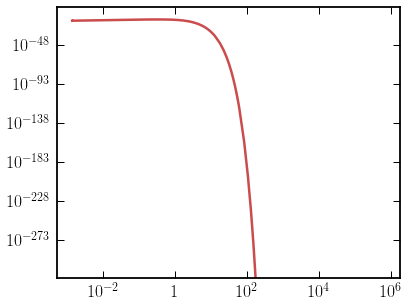

In [22]:
%autoreload 
res = bf.gamma_nl(100, 0, .25, T_r=.25)

plt.figure()

plt.loglog(res.eng, res.dNdE*res.eng**2)

# plt.axis([0, 1e4, 1e-20, 1e-12])

In [24]:
eng = np.logspace(1e-4, 1e2, num=500)

test = bf.gamma_B(eng, 0.25, T_r=0.25)

NameError: name 'l' is not defined